In [14]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import pprint
import random

In [15]:
import glob

In [16]:
path = '../../data/fits'
files_name = glob.glob(os.path.join(path, "*.fits"))

In [17]:
# files_name

In [18]:
data_i = 0
fits_file = files_name[data_i]

In [19]:
hdu_list = fits.open(fits_file)
hdu_list.info()
# hdu_list.close()

Filename: ../data/fits\hst_10190_12_acs_wfc_f814w_j90o12_drc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    1027   ()      
  1  SCI           1 ImageHDU        83   (5810, 5802)   float32   
  2  WHT           1 ImageHDU        44   (5810, 5802)   float32   
  3  CTX           1 ImageHDU        37   (5810, 5802)   int32   
  4  HDRTAB        1 BinTableHDU    638   16R x 314C   [9A, 3A, K, D, D, D, D, D, D, D, D, D, D, D, D, D, K, 8A, 9A, 7A, 18A, 4A, D, D, D, D, 3A, D, D, D, D, D, D, D, D, D, D, D, D, K, 8A, 23A, D, D, D, D, K, K, K, 8A, K, 23A, 9A, 20A, K, 4A, K, K, K, K, K, K, 23A, D, D, D, D, K, K, 3A, 3A, 4A, 7A, L, D, D, D, 23A, 1A, K, D, D, D, 13A, 3A, 4A, 4A, 12A, 12A, 23A, 8A, 23A, 10A, 10A, D, D, 3A, 3A, 23A, 4A, 8A, 7A, 23A, D, K, D, 6A, 9A, 8A, D, D, L, 4A, 44A, 3A, K, 7A, 5A, 3A, D, 13A, 8A, 4A, 3A, L, K, L, K, L, K, K, D, D, D, D, D, D, 3A, 1A, D, 23A, D, D, D, 3A, 23A, L, 1A, 3A, 1A, D, 3A, 6A, K, D, D, D, D, D, D, D

In [20]:
image_data = hdu_list['SCI'].data

In [21]:
print('Min:', np.min(image_data))
print('Max:', np.max(image_data))
print('Mean:', np.mean(image_data))
print('Stdev:', np.std(image_data))

Min: nan
Max: nan
Mean: nan
Stdev: nan


In [22]:
# filp the image to origin side
# this will help the image performance as a original image in DS9
image_data = np.flipud(image_data)

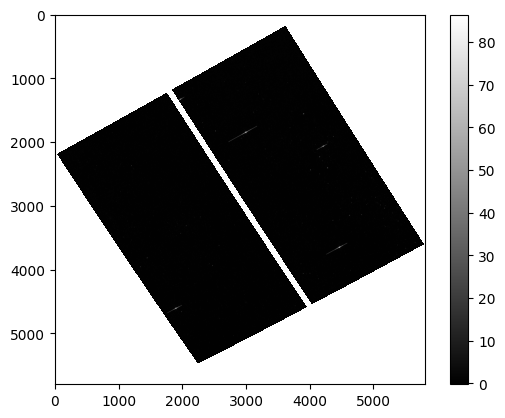

In [23]:
plt.imshow(image_data, cmap='gray')
# plt.imshow(image_data, cmap='gray')
plt.colorbar()

In [24]:
image_data

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [25]:
imgs_arr_scaled = image_data.copy()
imgs_arr_scaled[np.isnan(imgs_arr_scaled)] = 0

In [26]:
imgs_arr_scaled

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# Normalize Data

In [27]:
def normalize(data, lower=0, upper=255):
    return ((data - data.min()) / (data.max() - data.min())) * (upper - lower) + lower

In [28]:
normalize_img = normalize(imgs_arr_scaled)

In [29]:
print('Min:', np.min(normalize_img))
print('Max:', np.max(normalize_img))
print('Mean:', np.mean(normalize_img))
print('Stdev:', np.std(normalize_img))

Min: 0.0
Max: 255.0
Mean: 1.2666558
Stdev: 2.9543617


# FITS to jpg

In [30]:
from astropy.visualization import ZScaleInterval
from astropy.io import fits
import cv2
import numpy as np

In [31]:
# ref how to save FITS to JPG
# https://stackoverflow.com/questions/72707325/how-to-save-jpegs-of-fits-files

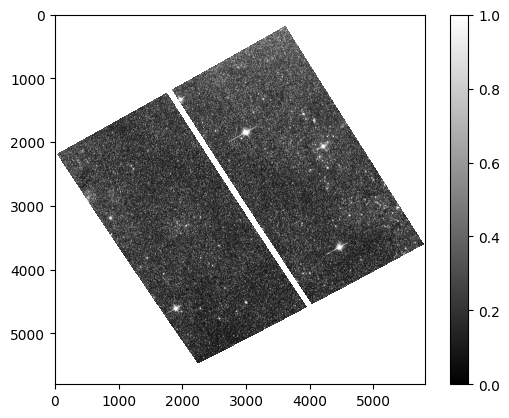

In [32]:
data = fits.getdata(fits_file)
data = np.flipud(data)
zscale = ZScaleInterval()
plt.imshow(zscale(data), cmap="gray")
# plt.savefig("../data/jpg/global_F814W/{}.jpg".format(data_i))
plt.colorbar()
# plt.show()
# plt.close()

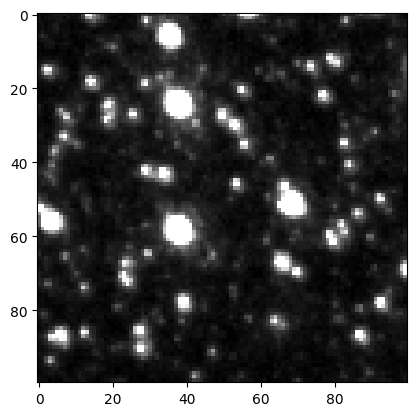

In [56]:
# flip zscale(data) by from arr[::-1]
# this will help the image performance as a original image in DS9
plt.imshow(zscale(data)[::-1][2000:2000+100, 1000:1000+100], cmap="gray")


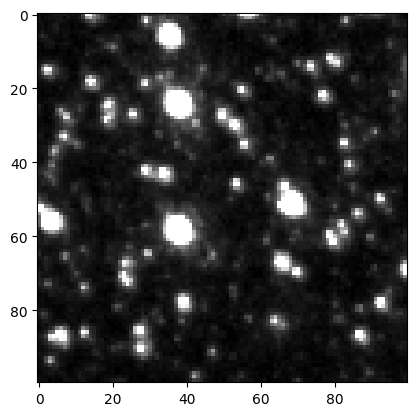

In [53]:
# flip zscale(data) by flippedImages then display
flippedImages = np.flipud(zscale(data))
plt.imshow(flippedImages, cmap="gray")


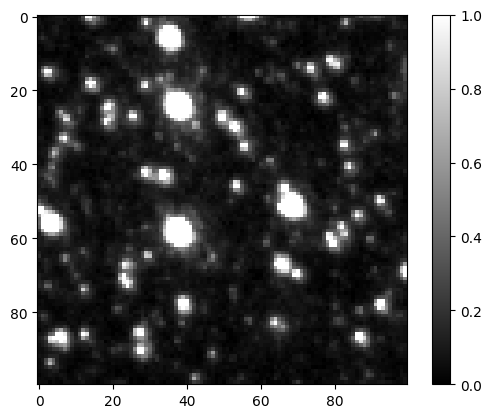

In [51]:
# display the image by flip vertical with inverte y-axis
imgY = np.flip((zscale(data)), axis=0)
plt.imshow(imgY[2000:2000+100, 1000:1000+100], cmap="gray")
plt.colorbar()

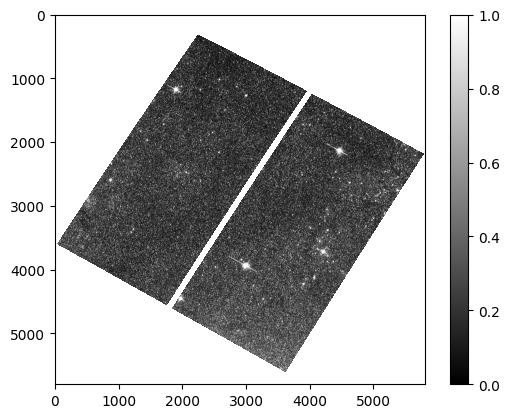

In [44]:
# display the image by flip vertical with inverte y-axis
imgY = np.flip((zscale(data)), axis=0)
plt.imshow(imgY, cmap="gray")
plt.colorbar()

In [ ]:
# display the image by flip vertical with inverte y-axis
# plt.imshow(zscale(data), cmap="gray", origin='lower')
# plt.colorbar()

In [34]:
# the image is saved in the same old resolution = len data in numpy array and display the image by flip vertical with inverte y-axis
def save_image(data, cm, fn):
    sizes = np.shape(data)
    height = float(sizes[0])
    width = float(sizes[1])
     
    fig = plt.figure()
    fig.set_size_inches(width/height, 1, forward=False)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
 
    ax.imshow(data, cmap=cm)
    plt.savefig(fn, dpi = height) 
    plt.close()

## make it with loop

In [45]:
path = '../../data/fits'
files_name = glob.glob(os.path.join(path, "*.fits"))

In [46]:
files_name

['../data/fits\\hst_10190_12_acs_wfc_f814w_j90o12_drc.fits',
 '../data/fits\\hst_10190_28_acs_wfc_f814w_j90o28_drc.fits',
 '../data/fits\\hst_14610_02_acs_wfc_f814w_jdb602_drc.fits',
 '../data/fits\\hst_14610_12_acs_wfc_f814w_jdb612_drc.fits',
 '../data/fits\\hst_14610_18_acs_wfc_f814w_jdb618_drc.fits',
 '../data/fits\\hst_14610_23_acs_wfc_f814w_jdb623_drc.fits',
 '../data/fits\\hst_14610_27_acs_wfc_f814w_jdb627_drc.fits',
 '../data/fits\\hst_14610_30_acs_wfc_f814w_jdb630_drc.fits',
 '../data/fits\\hst_14610_50_acs_wfc_f814w_jdb650_drc.fits',
 '../data/fits\\hst_16274_54_acs_wfc_f814w_je9t54_drc.fits']

In [47]:
# create new name without path file from files_name by replace .fits to .jpg
files_name_jpg = [i.split('\\')[-1].replace('.fits', '.jpg') for i in files_name]
files_name_jpg

['hst_10190_12_acs_wfc_f814w_j90o12_drc.jpg',
 'hst_10190_28_acs_wfc_f814w_j90o28_drc.jpg',
 'hst_14610_02_acs_wfc_f814w_jdb602_drc.jpg',
 'hst_14610_12_acs_wfc_f814w_jdb612_drc.jpg',
 'hst_14610_18_acs_wfc_f814w_jdb618_drc.jpg',
 'hst_14610_23_acs_wfc_f814w_jdb623_drc.jpg',
 'hst_14610_27_acs_wfc_f814w_jdb627_drc.jpg',
 'hst_14610_30_acs_wfc_f814w_jdb630_drc.jpg',
 'hst_14610_50_acs_wfc_f814w_jdb650_drc.jpg',
 'hst_16274_54_acs_wfc_f814w_je9t54_drc.jpg']

In [48]:
# save the image by named with the file name by with out .fits
for i in range(len(files_name)):
    fits_file = files_name[i]
    data = fits.getdata(fits_file)
    zscale = ZScaleInterval()
    data = zscale(data)
    data = np.flip(data, axis=0) # this line is to flip the image follow the original image in DS9
    save_image(data, 'gray', "../../data/jpg/global_F814W_InvertY/{}".format(files_name_jpg[i]))

# Save with 1000x pixel

In [ ]:
import glob

In [ ]:
path_ = '../../data/jpg/global_F814W/'
files_name_ = glob.glob(os.path.join(path_, "*"))

In [ ]:
files_name_

['../data/jpg/global_F814W\\0.jpg',
 '../data/jpg/global_F814W\\1.jpg',
 '../data/jpg/global_F814W\\2.jpg',
 '../data/jpg/global_F814W\\3.jpg',
 '../data/jpg/global_F814W\\4.jpg']

In [ ]:
from PIL import Image

# resize image in files_name_ to 1000x1000
# for i in range(len(files_name_)):
#     img = Image.open(files_name_[i])
#     img = img.resize((1024, 1024), Image.ANTIALIAS)
#     img.save("../../data/jpg/global_F814W_1000/{}.jpg".format(files_name_[i].split('\\')[-1]))